# Homework 3: Exploration in RL (due 11:59PM, April 5th, 2024)

In this homework, you will implement and compare a number of exploration strategies.

## Problem 1 (2 points)

Implement a **combination lock MDP** of length H = 20, number of actions A = 10, number of states per step = 3. Denote the states as $\{s_{h;1}, s_{h;2}, s_{h;3}\}_{h=1:20}$. While initializing the MDP, uniformly randomly choose one out of ten actions for each stage as the **good action**, denoted as $\{a^*_h\}_{h=1:20}$. Define the transition as: 

$$P(s_{h+1;1}|s_{h;1},a^*_h)=P(s_{h+1;2}|s_{h;1},a^*_h)=P(s_{h+1;1}|s_{h;2},a^*_h)=P(s_{h+1;2}|s_{h;2},a^*_h)=0.5$$
while for $a\neq a^*_h$,
$$P(s_{h+1;3}|s_{h;1},a)=P(s_{h+1;3}|s_{h;2},a)=P(s_{h+1;3}|s_{h;3},a)=1$$
Lastly, if you are in the bad state, for any action $a$,
$$P(s_{h+1;3}|s_{h;3},a)=1$$
In terms of rewards, the agent receives a reward of 10 upon reaching $s_{H,1}$ or $s_{H,2}$, at which point the episode will also reset. Otherwise the reward will always be 0.

In [4]:
import random

In [8]:
import gym
import numpy as np
import torch
import random

class CombLockMDP(gym.Env):
    """
    Methods:
        reset(): Resets the environment to the starting state.
        step(action): Takes a step in the environment.
    """

    def __init__(self, H=10, A=10, S=3, R=10, seed=0):
        ## Fill in here
        ## use the seed input as the random seed when generating the good actions.
        
        self.H=H
        self.A = A  # Number of actions
        self.S = S  # Number of states at each step
        self.R = R  # Reward for reaching the good terminal state

    def reset(self):
        
        ## Fill in here
        
        return self.state

    def step(self, action):
        
        ## Fill in here
        
        return self.state, reward, done, {}


## MINE

In [45]:
import gym
import numpy as np
import torch

class CombLockMDP(gym.Env):
    """
    A combination lock MDP environment.
    
    Methods:
        reset(): Resets the environment to the starting state.
        step(action): Takes a step in the environment based on the action.
    """

    def __init__(self, H=20, A=10, S=3, R=10, seed=0):
        # Set the random seed for reproducibility
        np.random.seed(seed)

        self.H = H  # Number of steps in the episode
        self.A = A  # Number of actions
        self.S = S  # Number of states at each step
        self.R = R  # Reward for reaching the good terminal state
        self.all_states = []

        # Initialize the action space and the observation space
        self.action_space = gym.spaces.Discrete(self.A)
        self.observation_space = gym.spaces.MultiDiscrete([1]*self.H)
        print('observation_space:',self.observation_space)
        
        # Generate the good action. There is only 1 good action.
        self.good_action = np.random.randint(self.A)
        print('good:',self.good_action)


    def reset(self):
        # Start at the first state
        self.current_step = 0
        self.state = 0 #random.randint(0,self.S-2)  # Initial state
        self.all_states.append(self.state)
        self.last_action_correct = True
        self.done = False
        return self.state

    def step(self, action):
        assert self.action_space.contains(action)
        reward = 0
        if(self.done):
            print("DONE")
            return self.state, reward, self.done

        if self.state != (self.S - 1):
            if action == self.good_action:
                # Correct action
                self.state = random.randint(0,self.S-2)
            else:
                self.state = self.S - 1
                self.last_action_correct = False

        self.current_step += 1
        self.all_states.append(self.state)
        
        if self.current_step >= self.H:
            self.done = True  # End the episode after H steps
            if self.state != self.S - 1:
                reward = 10
        return self.state, reward, self.done

# Example usage:
env = CombLockMDP()
state = env.reset()
print(f"Initial state: {state}")

for i in range(50):
    print(env.action_space.sample())

for i in range(20):
    #action == random.randint(0, 9)
    action = env.action_space.sample()
    current_state, reward, done = env.step(action)
    print(f"Current state: {current_state+1}, Reward: {reward}, Done: {done}")


observation_space: MultiDiscrete([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1])
good: 5
Initial state: 0
7
4
3
4
1
0
9
1
5
4
8
7
1
6
1
3
4
1
1
5
5
8
9
4
7
7
7
0
1
6
2
8
4
5
5
6
5
0
1
6
3
7
0
7
3
0
2
1
2
8
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
Current state: 3, Re

In [30]:
for j in range(50):
    env = CombLockMDP(H=20, A=2, S=3, R=10, seed=j+50)
    state = env.reset()
    print(f"Initial state: {state}")
    for i in range(3):
        action = random.randint(0, 1)
        #action = env.action_space.sample()
        current_state, reward, done = env.step(action)
        print(f"Current state: {current_state+1}, Reward: {reward}, Done: {done}")


observation_space: MultiDiscrete([3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3])
good: 0
Initial state: 1
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
observation_space: MultiDiscrete([3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3])
good: 9
Initial state: 1
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
observation_space: MultiDiscrete([3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3])
good: 5
Initial state: 1
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
observation_space: MultiDiscrete([3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3])
good: 9
Initial state: 1
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
Current state: 3, Reward: 0, Done: False
observation_space: MultiDiscrete([3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3])
good: 5
Initial state: 1
Cur

In [23]:
for i in range(50):
    print(np.random.randint(10))

8
8
9
2
7
5
5
4
5
8
5
8
1
1
8
7
0
3
4
2
0
3
5
1
2
4
3
0
6
0
7
2
8
3
0
8
4
2
9
0
3
8
1
4
3
3
6
7
3
5


Good action: 6
Episode 100 finished with reward: 0
Episode 200 finished with reward: 0
Episode 300 finished with reward: 0
Episode 400 finished with reward: 0
Episode 500 finished with reward: 0
Episode 600 finished with reward: 0
Episode 700 finished with reward: 0
Episode 800 finished with reward: 0
Episode 900 finished with reward: 0
Episode 1000 finished with reward: 0
Training complete


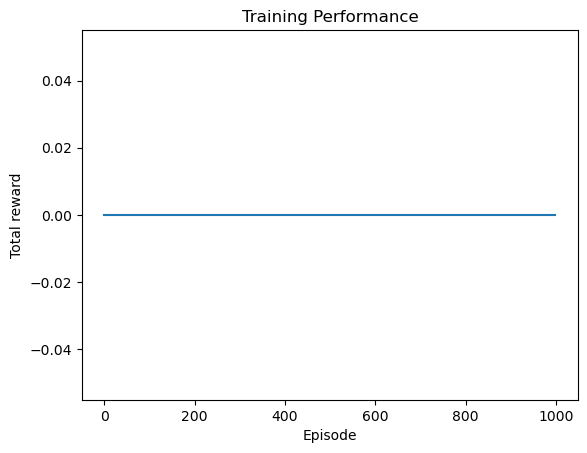

In [37]:
import gym
import numpy as np
import matplotlib.pyplot as plt

class CombLockMDP(gym.Env):
    """
    A combination lock MDP environment.

    Methods:
        reset(): Resets the environment to the starting state.
        step(action): Takes a step in the environment based on the action.
    """

    def __init__(self, H=20, A=10, S=3, R=10, seed=0):
        # Set the random seed for reproducibility
        np.random.seed(seed)

        self.H = H  # Number of steps in the episode
        self.A = A  # Number of actions
        self.S = S  # Number of states at each step
        self.R = R  # Reward for reaching the good terminal state

        # Initialize the action space and the observation space
        self.action_space = gym.spaces.Discrete(self.A)
        self.observation_space = gym.spaces.Discrete(self.S)

        # There is only one good action for all states and steps
        self.good_action = np.random.randint(self.A)
        print(f'Good action: {self.good_action}')

    def reset(self):
        # Start at the first state
        self.current_step = 0
        # Set the initial state to be the first state
        self.state = 0
        self.last_action_correct = True
        self.done = False
        return self.state

    def step(self, action):
        assert self.action_space.contains(action), "Invalid Action"
        reward = 0
        done = False

        if not self.done:
            if self.last_action_correct:
                if action == self.good_action:
                    # Correct action, transition to next state
                    self.state = (self.current_step + 1) % self.S
                else:
                    # Incorrect action, transition to bad state
                    self.state = self.S - 1
                    self.last_action_correct = False
            else:
                # Once in a bad state, always transition to the bad state
                self.state = self.S - 1

            # Update the current step
            self.current_step += 1
            if self.current_step >= self.H:
                done = True  # End the episode after H steps
                if self.state != self.S - 1:
                    # Reward only if not in a bad state
                    reward = self.R

            self.done = done

        return self.state, reward, done, {}

# Example usage:
env = CombLockMDP(H=20, A=10, S=3, R=10, seed=42)
total_rewards = []

num_episodes = 1000  # Number of episodes for training
for i_episode in range(num_episodes):
    state = env.reset()
    episode_reward = 0
    for t in range(env.H):
        # Randomly sample an action
        action = env.action_space.sample()
        state, reward, done, _ = env.step(action)
        episode_reward += reward
        if done:
            break
    total_rewards.append(episode_reward)
    if (i_episode + 1) % 100 == 0:
        print(f'Episode {i_episode + 1} finished with reward: {episode_reward}')

print('Training complete')
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.title('Training Performance')
plt.show()


In [10]:
def run_value_iteration(env, gamma=0.9, threshold=0.0001):
    """
    Run value iteration algorithm to find the optimal policy.

    Args:
    - env: The environment object.
    - gamma: Discount factor.
    - threshold: Threshold for value change to determine if iteration should stop.

    Returns:
    - policy: Optimal action for each state.
    - value_table: Final table of state values.
    """
    # Initialize value table specifically for CombLockMDP
    # It's a one-dimensional table, where each state is represented by the timestep.
    value_table = np.zeros(env.H)
    # Policy is an array of actions to take at each timestep
    policy = np.zeros(env.H, dtype=int)

    while True:
        updated_value_table = np.copy(value_table)

        # For each state, perform the update
        for state in range(env.H):
            Q_values = []
            
            # For each action, calculate the Q-value
            for action in range(env.A):
                # Assume default transition for CombLockMDP (deterministic)
                if state < env.H - 1:
                    next_state = state + 1
                else:
                    next_state = state  # Terminal state

                # Reward logic for CombLockMDP
                reward = env.R if (state == env.H - 1 and action == env.good_action) else 0

                # Calculate the Q-value
                Q_value = reward + gamma * updated_value_table[next_state]
                Q_values.append(Q_value)

            # Select the best action based on max Q-value
            best_action = np.argmax(Q_values)
            value_table[state] = Q_values[best_action]
            policy[state] = best_action

        # Check for convergence
        if np.max(np.abs(updated_value_table - value_table)) < threshold:
            break

    return policy, value_table


In [25]:
# Assuming you've defined CombLockMDP as before
env = CombLockMDP(H=20, A=10, S=3, R=10, seed=1)
optimal_policy, value_table = run_value_iteration(env)

# Assuming the actions are still 0-9 and action env.good_action is the 'good' action
print("Optimal Policy:")
print(optimal_policy)
print("\nValue Table:")
print(value_table)


observation_space: MultiDiscrete([3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3])
good: 5
Optimal Policy:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]

Value Table:
[13.50768365 15.00863    16.67634817 18.52936836 20.58827968 22.87595893
 25.41782476 28.24212012 31.38022608 34.86701049 38.74121538 43.04588748
 47.82885648 53.14326648 59.04816648 65.60916648 72.89916648 80.99916648
 89.99916648 99.99916648]


## Problem 2 (2 points)

Implement the UCBVI algorithm with reward bonus $b_h(s,a)=\alpha\sqrt{1/N_h(s,a)}$, where $\alpha$ is a hyperparameter that you will tune.

Run UCBVI in the combination lock MDP (with turned $\alpha$) and plot its learning curve: Cumulative reward v.s. training episode same as in HW2.

In [ ]:
class UCBVI(object):
    def __init__(self, alpha=1):
        self.alpha = alpha
        ## fill in other local parameters here

    def update(self, state, action, next_state, reward, done):
        ## fill in the local updates of UCBVI, including counts, \hat{P} and reward bonus and value iteration, 
        ## for which you can keep track of a Q table Q_h(s,a).

    def action(self, state):
        ## fill in the excuted action, i.e. return argmax_a \hat{Q}(s,a)      
        return action

In [ ]:
# Training loop: use a large enough num_episodes that make the algorithm converge.
num_episodes = 1000000

# Create an instance of the environment
env = CombLockMDP()

# Create an instance of UCBVI
# remember to tune your alpha!!!

agent = UCBVI(alpha) 

total_rewards = np.zeros(num_episodes)

for i_episode in range(num_episodes):
    state = env.reset()
    for h in range(env.H):
        action = agent.action(state)
        next_state, reward, done, _ = env.step(action)
        total_rewards[i_episode] += reward
        agent.update(state,action,next_state,reward, done)
        state = next_state
        if done:
            break

print('Complete')
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.title('Training Performance')
plt.show()

observation_space: MultiDiscrete([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1])
good: 0
Episode 0, Total Reward: 10
good_action 0
action_list [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Episode 100, Total Reward: 10
good_action 0
action_list [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Episode 200, Total Reward: 10
good_action 0
action_list [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Episode 300, Total Reward: 10
good_action 0
action_list [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Episode 400, Total Reward: 10
good_action 0
action_list [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Episode 500, Total Reward: 10
good_action 0
action_list [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Episode 600, Total Reward: 10
good_action 0
action_list [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Episode 700, Total Reward: 10
good_action 0
action_list [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

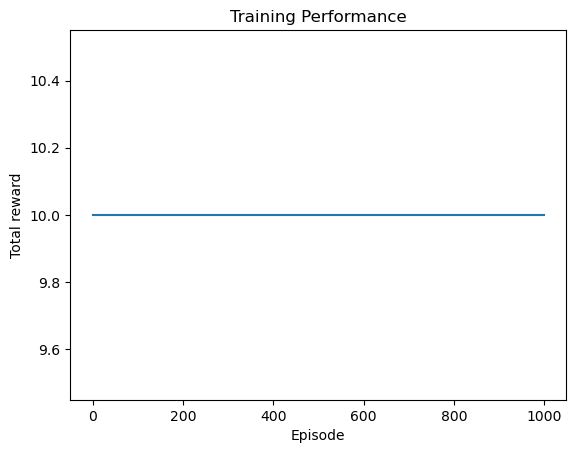

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import gym

class UCBVI(object):
    def __init__(self, alpha=1, H=20, A=10, S=3):
        self.alpha = alpha
        self.H = H
        self.A = A
        self.S = S

        # Initialize counts, Q-values and U-values for upper confidence bounds
        self.N = np.zeros((H, S, A)) # Count of visits to (state, action) pairs at each step
        self.Q = np.ones((H, S, A)) # Q values
        self.U = np.zeros((H, S, A)) # Upper confidence bounds

        self.action_list = np.zeros(self.H)

    def update(self, state, action, next_state, reward, done, step):
        # Increment the visitation counts
        self.N[step, state, action] += 1
        
        # Update Q value based on the received reward and the value of the next state
        next_state_value = np.max(self.Q[step+1, next_state]) if step+1 < self.H else 0
        alpha_n = 1 / self.N[step, state, action]
        self.Q[step, state, action] += alpha_n * (reward + next_state_value - self.Q[step, state, action])
        
        # Update the bonus and the upper confidence bound (U) value
        bonus = self.alpha * np.sqrt(1 / self.N[step, state, action])
        self.U[step, state, action] = self.Q[step, state, action] + bonus

    def action(self, state, step):
        # Pick the action with the highest upper confidence bound at the current state
        return np.argmax(self.U[step, state])

# Create an instance of the environment
env = CombLockMDP(H=5, A=3, S=3, R=10, seed=0)

# Training loop: use a large enough num_episodes that make the algorithm converge.
num_episodes = 1000  # Adjust this number as needed
alpha = 1  # You'll need to tune this hyperparameter

# Create an instance of UCBVI
agent = UCBVI(alpha=alpha, H=env.H, A=env.A, S=env.S) 

total_rewards = []

for i_episode in range(num_episodes):
    state = env.reset()
    episode_reward = 0
    for h in range(env.H):
        action = agent.action(state, h)
        agent.action_list[h] =  action
        next_state, reward, done = env.step(action)
        episode_reward += reward
        agent.update(state, action, next_state, reward, done, h)
        state = next_state
        if done:
            break
    total_rewards.append(episode_reward)
    if i_episode % 100 == 0:
        print(f'Episode {i_episode}, Total Reward: {episode_reward}')
        print('good_action',env.good_action)
        print('action_list',agent.action_list)

print('Complete')
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.title('Training Performance')
plt.show()


# TRY

In [1]:
import gym
import numpy as np
import torch

class CombLockMDP(gym.Env):
    """
    A combination lock MDP environment.
    
    Methods:
        reset(): Resets the environment to the starting state.
        step(action): Takes a step in the environment based on the action.
    """

    def __init__(self, H=20, A=10, S=3, R=10, seed=0):
        # Set the random seed for reproducibility
        np.random.seed(seed)

        self.H = H  # Number of steps in the episode
        self.A = A  # Number of actions
        self.S = S  # Number of states at each step
        self.R = R  # Reward for reaching the good terminal state
        self.all_states = []

        # Initialize the action space and the observation space
        self.action_space = gym.spaces.Discrete(self.A)
        self.observation_space = gym.spaces.MultiDiscrete([1]*self.H)
        #print('observation_space:',self.observation_space)
        
        # Generate the good action. There is only 1 good action.
        self.good_action = np.random.randint(self.A)
        print('good:',self.good_action)


    def reset(self):
        # Start at the first state
        self.current_step = 0
        self.state = 0 #random.randint(0,self.S-2)  # Initial state
        self.all_states.append(self.state)
        self.last_action_correct = True
        self.done = False
        return self.state

    def step(self, action):
        assert self.action_space.contains(action)
        reward = 0
        if(self.done):
            print("DONE")
            return self.state, reward, self.done

        if self.state != (self.S - 1):
            if action == self.good_action:
                # Correct action
                self.state = np.random.randint(0,self.S-1)
            else:
                self.state = self.S - 1
                self.last_action_correct = False

        self.current_step += 1
        self.all_states.append(self.state)
        
        if self.current_step >= self.H:
            self.done = True  # End the episode after H steps
            if self.state != self.S - 1:
                reward = 10
        return self.state, reward, self.done

# Example usage:
env = CombLockMDP()
state = env.reset()
print(f"Initial state: {state}")


for i in range(20):
    #action == random.randint(0, 9)
    action = env.action_space.sample()
    print(action)
    current_state, reward, done = env.step(action)
    print(f"Current state: {current_state+1}, Reward: {reward}, Done: {done}")


good: 5
Initial state: 0
6
Current state: 3, Reward: 0, Done: False
4
Current state: 3, Reward: 0, Done: False
4
Current state: 3, Reward: 0, Done: False
2
Current state: 3, Reward: 0, Done: False
2
Current state: 3, Reward: 0, Done: False
1
Current state: 3, Reward: 0, Done: False
7
Current state: 3, Reward: 0, Done: False
9
Current state: 3, Reward: 0, Done: False
2
Current state: 3, Reward: 0, Done: False
7
Current state: 3, Reward: 0, Done: False
8
Current state: 3, Reward: 0, Done: False
0
Current state: 3, Reward: 0, Done: False
8
Current state: 3, Reward: 0, Done: False
8
Current state: 3, Reward: 0, Done: False
6
Current state: 3, Reward: 0, Done: False
1
Current state: 3, Reward: 0, Done: False
8
Current state: 3, Reward: 0, Done: False
9
Current state: 3, Reward: 0, Done: False
6
Current state: 3, Reward: 0, Done: False
8
Current state: 3, Reward: 0, Done: True


good: 0
Episode 1000: Total Reward: 0
[3, 1, 0, 2, 2]
[0, 2, 2, 2, 2, 2]
9.0
Episode 2000: Total Reward: 0
[3, 3, 2, 3, 3]
[0, 2, 2, 2, 2, 2]
8.1
Episode 3000: Total Reward: 0
[3, 1, 3, 3, 2]
[0, 2, 2, 2, 2, 2]
7.289999999999999
Episode 4000: Total Reward: 0
[3, 3, 1, 0, 2]
[0, 2, 2, 2, 2, 2]
6.560999999999999
Episode 5000: Total Reward: 0
[3, 1, 2, 0, 3]
[0, 2, 2, 2, 2, 2]
5.9049
Episode 6000: Total Reward: 0
[3, 3, 3, 0, 3]
[0, 2, 2, 2, 2, 2]
5.31441
Episode 7000: Total Reward: 0
[3, 1, 1, 0, 3]
[0, 2, 2, 2, 2, 2]
4.782969
Episode 8000: Total Reward: 0
[3, 3, 2, 1, 3]
[0, 2, 2, 2, 2, 2]
4.3046720999999994
Episode 9000: Total Reward: 0
[3, 1, 3, 1, 3]
[0, 2, 2, 2, 2, 2]
3.8742048899999997
Episode 10000: Total Reward: 0
[3, 3, 1, 2, 3]
[0, 2, 2, 2, 2, 2]
Complete


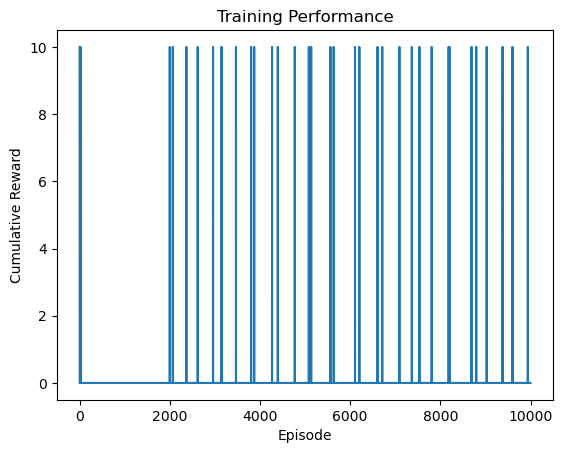

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym

class UCBVI:
    def __init__(self, H, A, S, alpha=1):
        self.H = H
        self.A = A
        self.S = S
        self.alpha = alpha
        self.Q = np.full((H, S, A), 10, dtype=np.float32)  # Optimistic initialization
        self.V = np.zeros((H+1), dtype=np.float32)
        self.N = np.zeros((H, S, A), dtype=np.int32)  # State-action counts
        self.N_sas = np.zeros((H, S, A, S), dtype=np.int32)  # State-action-next-state counts
        self.P_hat = np.zeros((H, S, A, S), dtype=np.float32)  # Empirical transition probabilities
        self.D = []  # Dataset of experiencesself.N = np.zeros((H, A), dtype=np.int32)  # State-action counts
# self.N_sas and self.P_hat might not be necessary for a deterministic MDP like CombLockMDP
        self.steps=0

    def update(self, h, s, a, next_s, r):
        self.N[h, s, a] += 1
        self.N_sas[h, s, a, next_s] += 1
        
        # Empirical transition probabilities for the observed next state
        self.P_hat[h, s, a] = self.N_sas[h, s, a] / np.sum(self.N_sas[h, s, a])
        
        # Calculate the Q-value for state s and action a
        q_value_update = r + np.dot(self.P_hat[h, s, a], self.V[h+1]) + self.bonus(h, s, a)
        
        # Update the Q-value if the new Q-value is less than the current one
        self.Q[h, s, a] = np.min(np.append(q_value_update, self.Q[h, s, a]))
    
        # Update the value function for state s
        self.V[h] = np.max(self.Q[h, s])
        
        if self.steps==1000:
            self.steps=0
            self.alpha=self.alpha-self.alpha*0.1
            print(self.alpha)


    def bonus(self, h, s, a):
        return self.alpha * np.sqrt(1 / (1 + self.N[h, s, a]))

    def action(self, h, s):
        return np.argmax(self.Q[h, s] + self.bonus(h, s, np.arange(self.A)))

# Assuming CombLockMDP is defined and imported properly
env = CombLockMDP(H=5, A=4, S=3, R=10, seed=0)

K = 10000  # Total episodes
alpha = 10  # Confidence interval parameter
agent = UCBVI(H=env.H, A=env.A, S=env.S,alpha=alpha)

total_rewards = []
#print(agent.Q)

for k in range(K):
    s = env.reset()
    episode_reward = 0
    action_list=[]
    state_list=[s]
    for h in range(env.H):
        a = agent.action(h, s)
        action_list.append(a)
        #print(a)
        next_s, r, done = env.step(a)
        episode_reward += r
        agent.update(h, s, a, next_s, r)
        s = next_s
        state_list.append(s)
        if done:
            #print(agent.Q)
            agent.steps+=1
            break
    total_rewards.append(episode_reward)
    if (k + 1) % 1000 == 0:
        print(f'Episode {k + 1}: Total Reward: {episode_reward}')
        print(action_list)
        print(state_list)

print('Complete')
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Training Performance')
plt.show()


In [59]:
agent.Q

array([[[ 0.01225125,  0.01225125,  0.01225125,  0.01225125,
          0.01225125,  0.01225125,  0.01225125,  0.01225125,
          0.01225125,  0.01225125],
        [10.        , 10.        , 10.        , 10.        ,
         10.        , 10.        , 10.        , 10.        ,
         10.        , 10.        ],
        [10.        , 10.        , 10.        , 10.        ,
         10.        , 10.        , 10.        , 10.        ,
         10.        , 10.        ]],

       [[ 0.05478405,  0.05478405,  0.05478405,  0.05478405,
          0.05478405,  0.05478405,  0.05478405,  0.05478405,
          0.05478953,  0.05478953],
        [ 0.05477858,  0.05477858,  0.05478405,  0.05478405,
          0.05478405,  0.05478405,  0.05478405,  0.05478405,
          0.05478405,  0.05478405],
        [ 0.01291394,  0.01291394,  0.01291394,  0.01291394,
          0.01291394,  0.01291394,  0.01291394,  0.01291394,
          0.01291394,  0.01291394]],

       [[ 0.17274226,  0.17274226,  0.17291422, 

Complete


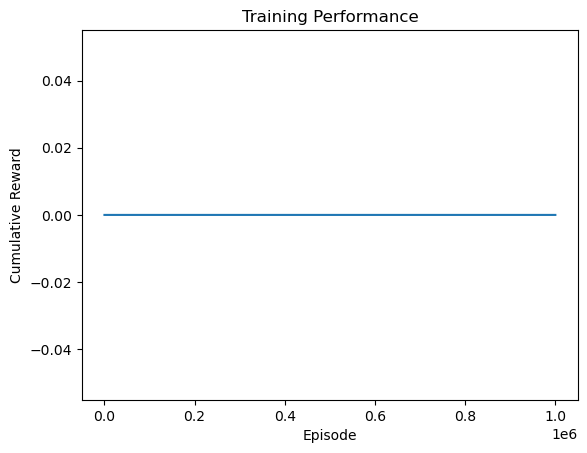

In [58]:
print('Complete')
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Training Performance')
plt.show()

## Problem 3 (2 points)

Implement DQN with $\epsilon$-greedy, where $\epsilon$ is a hyperparameter that you will tune. (You should have already have this code from HW2!)

Run DQN+$\epsilon$-greedy in the combination lock MDP (with turned $\epsilon$) and plot its learning curve: Cumulative reward v.s. training episode same as in HW2.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import random

class DQN(nn.Module):
    def __init__(self, input_size, output_size):
        super(DQN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_size)
        )

    def forward(self, x):
        return self.network(x)

def select_action(state, model, epsilon):
    if random.random() < epsilon:
        return np.random.randint(env.action_space.n)
    else:
        with torch.no_grad():
            q_values = model(torch.FloatTensor(state).unsqueeze(0))
            return q_values.max(1)[1].item()


In [6]:
# Hyperparameters
epsilon_start = 1.0
epsilon_end = 0.01
epsilon_decay = 500
episodes = 1000
batch_size = 64
gamma = 0.99

# Environment setup
env = CombLockMDP()  # Initialize your environment
input_size = env.observation_space.shape[0]
output_size = 1 #env.action_space.n -> 1

model = DQN(input_size, output_size)
optimizer = optim.Adam(model.parameters())
memory = deque(maxlen=10000)

def optimize_model():
    if len(memory) < batch_size:
        return
    transitions = random.sample(memory, batch_size)
    batch_state, batch_action, batch_next_state, batch_reward, batch_done = zip(*transitions)

    batch_state = torch.FloatTensor(batch_state)
    batch_action = torch.LongTensor(batch_action)
    batch_reward = torch.FloatTensor(batch_reward)
    batch_next_state = torch.FloatTensor(batch_next_state)
    batch_done = torch.FloatTensor(batch_done)

    current_q = model(batch_state).gather(1, batch_action.unsqueeze(1)).squeeze(1)
    max_next_q = model(batch_next_state).max(1)[0]
    expected_q = batch_reward + gamma * max_next_q * (1 - batch_done)

    loss = nn.MSELoss()(current_q, expected_q)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

cumulative_rewards = []

for episode in range(episodes):
    state = env.reset()
    total_reward = 0
    epsilon = epsilon_end + (epsilon_start - epsilon_end) * np.exp(-1. * episode / epsilon_decay)
    
    while True:
        action = select_action(state, model, epsilon)
        next_state, reward, done  = env.step(action)
        total_reward += reward
        
        memory.append((state, action, next_state, reward, done))
        state = next_state
        
        optimize_model()
        
        if done:
            break

    cumulative_rewards.append(total_reward)
    print(f"Episode {episode}, Total reward: {total_reward}")

# Plotting the learning curve
plt.figure(figsize=(10, 5))
plt.plot(cumulative_rewards)
plt.title('Cumulative Reward vs. Training Episode')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.show()


good: 5


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x64 and 20x128)

Original example

In [ ]:
import gym
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torch
import torch.nn as nn

class DQN(nn.Module):
    def __init__(self, n_observations, n_actions):
        super(DQN, self).__init__()
        self.layer1 = nn.Linear(n_observations, 128)
        self.layer2 = nn.Linear(128, n_actions)  # Two-layer MLP

    def forward(self, x):
        x = F.relu(self.layer1(x))
        return self.layer2(x)  # Q-values for each action

# Hyperparameters (adjust as needed)
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200
BATCH_SIZE = 128

# Function for selecting actions with ϵ-greedy exploration
def select_action(state, policy_net, steps_done):
    eps_threshold = EPS_END + (EPS_START - EPS_END) * math.exp(-1. * steps_done / EPS_DECAY)
    sample = random.random()
    if sample > eps_threshold:
        with torch.no_grad():
            # Ensure state has batch dimension and correct shape
            state = state.unsqueeze(0)
            q_values = policy_net(state)
            action = q_values.argmax(dim=1)
            return action.item()
    else:
        return random.randrange(n_actions)


# Named tuple for storing transitions
Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))

# Replay memory to store and sample transitions
class ReplayMemory(object):
    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

# Initialize the Gridworld environment
env = GridworldEnv()

# Get the number of actions and observations
n_actions = env.action_space.n
n_observations = env.observation_space.shape[0]

# Initialize Q-networks
policy_net = DQN(n_observations, n_actions).to(device)
target_net = DQN(n_observations, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())

# Initialize optimizer and replay memory
optimizer = optim.AdamW(policy_net.parameters(), lr=1e-4, amsgrad=True)
memory = ReplayMemory(10000)

In [ ]:
def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
    # detailed explanation). This converts batch-array of Transitions
    # to Transition of batch-arrays.
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.tensor([[s for s in batch.next_state
                                                if s is not None]], device=device).t()
    state_batch = torch.tensor([batch.state], device=device).t()
    action_batch = torch.tensor([batch.action], device=device).t()
    reward_batch = torch.tensor([batch.reward], device=device).t()

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1).values
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    with torch.no_grad():
        next_state_values[non_final_mask] = target_net(non_final_next_states).max(dim=1).values
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * env.gamma) + reward_batch

    # Compute Huber loss
    criterion = nn.SmoothL1Loss()
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    # In-place gradient clipping
    torch.nn.utils.clip_grad_value_(policy_net.parameters(), 100)
    optimizer.step()

In [ ]:
# Training loop
num_episodes = 200
episode_durations = []

for i_episode in range(num_episodes):
    state = torch.tensor(env.reset(), device=device, dtype=torch.float)
    for t in count():
        action = select_action(state, policy_net, t)
        observation, reward, done, _ = env.step(action)
        reward = torch.tensor([reward], device=device)

        if not done:
            next_state = torch.tensor(observation, device=device, dtype=torch.float)
        else:
            next_state = None

        # Store the transition in memory
        memory.push(state, torch.tensor([action], device=device), next_state, reward)

        # Move to the next state
        state = next_state

        # Perform one step of the optimization (on the policy network)
        optimize_model()

        # Soft update of the target network's weights
        # θ′ ← τ θ + (1 −τ )θ′
        target_net_state_dict = target_net.state_dict()
        policy_net_state_dict = policy_net.state_dict()
        for key in policy_net_state_dict:
            target_net_state_dict[key] = policy_net_state_dict[key]*0.005 + target_net_state_dict[key]*(1-0.005)
        target_net.load_state_dict(target_net_state_dict)

        if done or t > 200:
            episode_durations.append(t + 1)
            break

print('Complete')
plt.plot(episode_durations)
plt.xlabel('Episode')
plt.ylabel('Duration')
plt.title('Training Performance')
plt.show()


adjust

In [14]:
import gym
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torch
import torch.nn as nn

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [63]:
class DQN(nn.Module):
    def __init__(self, n_actions):
        super(DQN, self).__init__()
        self.layer1 = nn.Linear(1, 128)  # Assuming a scalar state, hence `1` here
        self.layer2 = nn.Linear(128, n_actions)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        return self.layer2(x)

# Assuming CombLockMDP is already defined
env = CombLockMDP(H=4, A=3, S=3, R=10, seed=0)  # Initialize your CombLockMDP environment

n_actions = env.action_space.n

# Since the state in CombLockMDP might be a scalar representing the timestep,
# we don't need n_observations like in the gridworld environment
policy_net = DQN(n_actions).to(device)
target_net = DQN(n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())

# Rest of the setup remains mostly the same


good: 0


<All keys matched successfully>

In [64]:
def select_action(state, policy_net, steps_done, n_actions):
    eps_threshold = EPS_END + (EPS_START - EPS_END) * math.exp(-1. * steps_done / EPS_DECAY)
    if random.random() > eps_threshold:
        with torch.no_grad():
            # Assuming state is correctly shaped for the network
            q_values = policy_net(state)
            action = q_values.max(0)[1].view(1, 1)  # Take max across dimension 0
            return action
    else:
        return torch.tensor([[random.randrange(n_actions)]], device=device, dtype=torch.long)


In [65]:
def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    batch = Transition(*zip(*transitions))

    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None, batch.next_state)), device=device, dtype=torch.bool)
    
    # Here we need to ensure that the states and next_states are properly formatted
    non_final_next_states = torch.cat([torch.tensor(s).unsqueeze(0) for s in batch.next_state if s is not None]).to(device)
    state_batch = torch.cat([torch.tensor(s).unsqueeze(0) for s in batch.state]).to(device)
    
    action_batch = torch.tensor(batch.action, device=device).unsqueeze(-1)
    reward_batch = torch.tensor(batch.reward, device=device)

    # Compute Q(s_t, a)
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    with torch.no_grad():
        next_state_values[non_final_mask] = target_net(non_final_next_states).max(dim=1).values

    # Compute the expected Q values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Compute Huber loss
    criterion = nn.SmoothL1Loss()
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    torch.nn.utils.clip_grad_value_(policy_net.parameters(), 100)
    optimizer.step()


In [66]:
class ReplayMemory(object):
    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)


In [67]:
from collections import namedtuple

Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))


/scratch/5929199.1.casaq-gpu-pub/ipykernel_3526258/2964877311.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  non_final_next_states = torch.cat([torch.tensor(s).unsqueeze(0) for s in batch.next_state if s is not None]).to(device)
/scratch/5929199.1.casaq-gpu-pub/ipykernel_3526258/2964877311.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state_batch = torch.cat([torch.tensor(s).unsqueeze(0) for s in batch.state]).to(device)


Complete


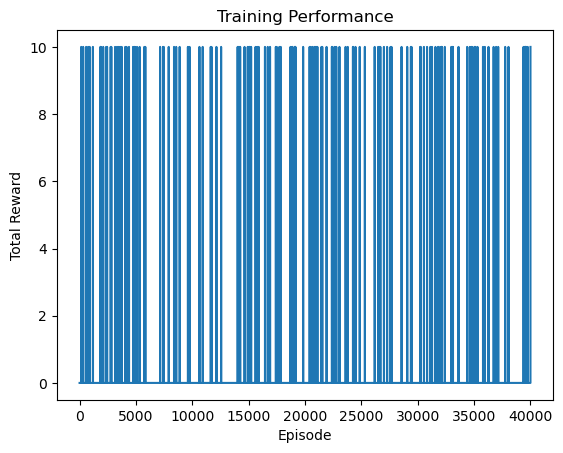

In [70]:
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200
BATCH_SIZE = 128
GAMMA = 0.99  # Assuming gamma is defined here for discounting future rewards

steps_done = 0  # Initialize steps counter for epsilon decay


num_episodes = 10000
episode_rewards = []
target_update_frequency = 10  # Update target network every 10 episodes

memory = ReplayMemory(10000)  # or whatever capacity you prefer

episode_durations = []  # Add this line to initialize the list

for i_episode in range(num_episodes):
    initial_state = env.reset()  # Get the initial state from the environment
    state = torch.tensor([initial_state], device=device, dtype=torch.float)  # Ensure it's a tensor
    total_reward = 0

    for t in count():
        action = select_action(state, policy_net, steps_done, n_actions)
        observation, reward, done = env.step(action.item())
        episode_rewards.append(reward)
        total_reward += reward

        if not done:
            next_state = torch.tensor([observation], device=device, dtype=torch.float)
        else:
            next_state = None

        memory.push(state, action, next_state, torch.tensor([reward], device=device))
        
        state = next_state if next_state is not None else torch.tensor([env.reset()], device=device, dtype=torch.float)

        optimize_model()
        
        if done:
            episode_durations.append(t + 1)  # No error here since episode_durations is now defined
            break

    # Other code such as updating the target network etc.


    # Update the target network every few episodes
    if i_episode % target_update_frequency == 0:
        target_net.load_state_dict(policy_net.state_dict())

print('Complete')
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Training Performance')
plt.show()


In [59]:
print(i_episode)

15810


## Problem 4 (3 points)

Implement DQN with RND using a randomly neural network as the target network $f:S\rightarrow \mathbb{R}^d$, and use the reward bonus in the form of $\alpha||\hat{f}(s)-f(s)||_2^2$. 

Run DQN+RND in the combination lock MDP (with turned hyperparameters, including $\alpha$, the replay buffer size, learning rates, etc) and plot its learning curve: Cumulative reward v.s. training episode same as in HW2.

An example implementation of DQN+RND can be found [here](https://github.com/orrivlin/MountainCar_DQN_RND).

In [71]:
class PredictorNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(PredictorNetwork, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.network(x)

class TargetNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(TargetNetwork, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )
        for param in self.network.parameters():
            param.requires_grad = False  # Freeze the target network

    def forward(self, x):
        return self.network(x)


In [73]:
# Assuming the DQN setup and ReplayMemory are already defined

# Initialize the RND networks
state_dim = env.observation_space.shape[0]
intrinsic_output_dim = 50  # dimensionality of the RND output
predictor_net = PredictorNetwork(state_dim, intrinsic_output_dim).to(device)
target_net = TargetNetwork(state_dim, intrinsic_output_dim).to(device)
rnd_optimizer = optim.Adam(predictor_net.parameters(), lr=1e-4)

alpha = 0.1  # scaling factor for intrinsic reward

for i_episode in range(num_episodes):
    state = env.reset()
    state = torch.tensor([state], device=device, dtype=torch.float)
    total_reward = 0

    for t in count():
        action = select_action(state, policy_net, steps_done, n_actions)
        next_state, reward, done = env.step(action.item())
        reward = torch.tensor([reward], device=device, dtype=torch.float)

        # Compute intrinsic reward using RND networks
        state_tensor = state.float()
        target_pred = target_net(state_tensor)
        predictor_pred = predictor_net(state_tensor)
        intrinsic_reward = alpha * F.mse_loss(predictor_pred, target_pred.detach())
        combined_reward = reward + intrinsic_reward

        if not done:
            next_state_tensor = torch.tensor([next_state], device=device, dtype=torch.float)
        else:
            next_state_tensor = None

        memory.push(state, action, next_state_tensor, combined_reward)
        state = next_state_tensor if next_state_tensor is not None else torch.tensor([env.reset()], device=device, dtype=torch.float)

        optimize_model()  # Make sure to update the DQN and RND networks accordingly

        if done:
            break
    # Update RND predictor network here if necessary


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x1 and 4x128)

## Problem 5 (1 points)

Plot the performance curve of UCBVI, DQN with $\epsilon$-greedy, and DQN+RND in the same figure.

In [ ]:
## Your code goes here